#ASSIGNMENT - A2a
# **Performing Multiple regression analysis on NSSO68 data**

* **AUTHOR**     : Rakshitha Vignesh Sargurunathan               

* **VID**        : V01109007

* **CREATED ON** : 06/22/2024

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
nss=pd.read_csv('/content/drive/MyDrive/SCMA/A1a/NSSO68.csv')

In [3]:
nss.shape

(101662, 384)

In [4]:
nss.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [5]:
nss['MPCE_URP'].nunique()

42620

In [6]:
nss.shape

(101662, 384)

In [7]:
nss.describe()

,slno,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,District,...,preparedsweet_v,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,Region,fruits_df_tt_v,fv_tot
count,101662.00000,101662.0,101662.000000,101662.0,101662.0,101662.0,101662.000000,101662.000000,101662.000000,101662.000000,...,101662.000000,101662.000000,101662.000000,101662.000000,101662.000000,101662.000000,101662.000000,101662.000000,101662.000000,101662.000000
mean,50831.50000,1.0,62650.405294,68.0,10.0,1.0,1.412809,18.480475,187.075023,14.314493,...,8.585428,0.000890,0.000447,1.758345,22.107033,632.363361,24.425867,2.270278,30.592599,109.811496
std,29347.43587,0.0,14800.582278,0.0,0.0,0.0,0.492341,9.724855,97.477505,12.633311,...,27.233632,0.003494,0.003129,78.892958,87.234010,367.575942,9.963954,1.335235,54.317484,88.606461
min,1.00000,1.0,41000.000000,68.0,10.0,1.0,1.000000,1.000000,11.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,25416.25000,1.0,46527.000000,68.0,10.0,1.0,1.000000,9.000000,95.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,4.166667,411.092812,18.750315,1.000000,2.000000,58.101667
50%,50831.50000,1.0,71793.000000,68.0,10.0,1.0,1.000000,19.000000,194.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,12.000000,564.842818,23.022847,2.000000,14.285714,88.000000
75%,76246.75000,1.0,75374.000000,68.0,10.0,1.0,2.000000,27.000000,275.000000,20.000000,...,8.750000,0.000000,0.000000,0.000000,26.672417,775.678250,28.558968,3.000000,37.500000,134.372857
max,101662.00000,1.0,79998.000000,68.0,10.0,1.0,2.000000,35.000000,351.000000,71.000000,...,4591.666667,0.150000,0.105000,25000.000000,25030.000000,25852.584000,496.205150,6.000000,5708.250000,6024.725000


#DATA PREPROCESSING


In [8]:
#CHECK FOR MISSING VALUES
missing_values=nss.isnull().sum()
print(missing_values[missing_values>0])

FOD_Sub_Region                          8
NIC_2008                             7511
NCO_2004                             7487
HH_type                                27
Religion                                3
Social_Group                           14
Whether_owns_any_land                  10
Type_of_land_owned                  13905
Land_Owned                          14415
Land_Leased_in                      83852
Otherwise_possessed                 97383
Land_Leased_out                     96800
Land_Total_possessed                  439
During_July_June_Cultivated         59682
During_July_June_Irrigated          77148
land_tt                               439
Cooking_code                            5
Lighting_code                           8
Dwelling_unit_code                      7
Regular_salary_earner                  12
Perform_Ceremony                       64
Meals_seved_to_non_hhld_members     11385
Possess_ration_card                    13
Type_of_ration_card               

In [9]:
nss.dtypes

slno                int64
grp                object
Round_Centre        int64
FSU_number          int64
Round               int64
                   ...   
foodtotal_q       float64
state_1            object
Region              int64
fruits_df_tt_v    float64
fv_tot            float64
Length: 384, dtype: object

In [10]:
# Define features and target
features = [
    'ricepds_q', 'pulsep_q', 'hhdsz', 'Land_Total_possessed',
    'During_July_June_Cultivated', 'During_July_June_Irrigated', 'MPCE_URP', 'MPCE_MRP'
]
target = 'foodtotal_v'

In [11]:
# Handle missing values by imputing with mean

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(nss[features])
X = pd.DataFrame(X_imputed, columns=features)
y = nss[target].dropna()

In [12]:
numerical_cols = nss.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = nss.select_dtypes(include=['object','category']).columns

print("NUMERICAL COLUMNS: ",numerical_cols)
print("\nCATEGORICAL COLUMNS: ",categorical_cols)

NUMERICAL COLUMNS:  Index(['slno', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region', 'District',
       ...
       'preparedsweet_v', 'pickle_v', 'sauce_jam_v', 'Othrprocessed_v',
       'Beveragestotal_v', 'foodtotal_v', 'foodtotal_q', 'Region',
       'fruits_df_tt_v', 'fv_tot'],
      dtype='object', length=382)

CATEGORICAL COLUMNS:  Index(['grp', 'state_1'], dtype='object')


In [13]:
nss = pd.get_dummies(nss, columns=['state_1'], drop_first=True)

# MODEL FITTING

In [14]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
# Convert the scaled features back to a DataFrame and add the constant term
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled = sm.add_constant(X_test_scaled)

In [17]:
# Ensure the indices are aligned by resetting them
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


In [18]:
# Fit the regression model
model = sm.OLS(y_train, X_train_scaled).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            foodtotal_v   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     5658.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:34:33   Log-Likelihood:            -5.7550e+05
No. Observations:               81329   AIC:                         1.151e+06
Df Residuals:                   81320   BIC:                         1.151e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

#REGRESSION DIAGNOSTICS

In [19]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)
y_pred

0        521.361444
1        648.737815
2        605.210660
3        492.042672
4        677.304051
            ...    
20328    568.350103
20329    587.727520
20330    835.782340
20331    795.663967
20332    511.116869
Length: 20333, dtype: float64

In [20]:
# Calculate R-squared on test data
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared on test data: {r2}')

R-squared on test data: 0.3292052477262559


In [21]:
# R-squared and Adjusted R-squared
r_squared = model.rsquared
adj_r_squared = model.rsquared_adj

print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adj_r_squared}")

R-squared: 0.35757877290121365
Adjusted R-squared: 0.35751557356750996


In [42]:
# P-values
p_values = model.pvalues
print("P-values:\n", p_values)


P-values:
 const                           0.000000e+00
ricepds_q                      5.809005e-154
pulsep_q                        6.435995e-89
hhdsz                          6.094092e-150
Land_Total_possessed            2.836760e-31
During_July_June_Cultivated     8.354853e-01
During_July_June_Irrigated      1.269943e-05
MPCE_URP                        2.987472e-11
MPCE_MRP                        0.000000e+00
dtype: float64


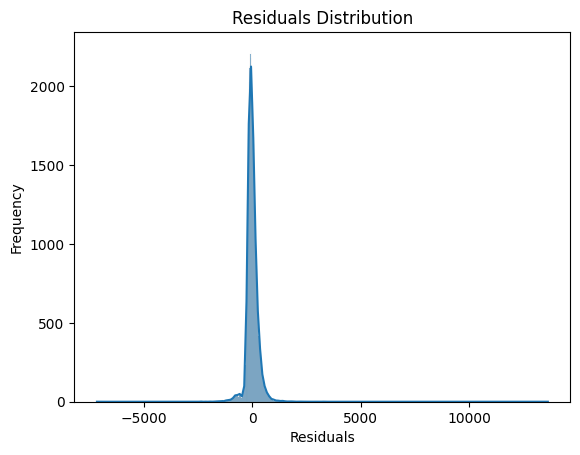

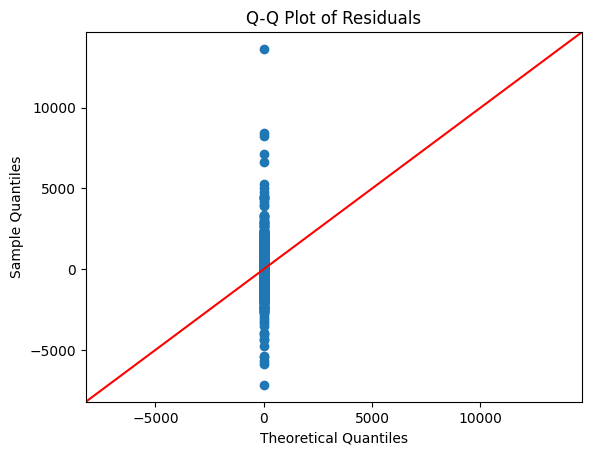


Shapiro-Wilk Test: Statistic=0.7823533415794373, p-value=0.0


In [43]:
#Residuals Analysis
import scipy.stats as stats

# Residuals
residuals = model.resid

# Plot residuals
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
sm.qqplot(residuals, line ='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk Test
shapiro_test = stats.shapiro(residuals)
print(f"\nShapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
print(vif_data)

# Remove features with high VIF (example assumes 'MPCE_MRP' has high VIF)
X_train_scaled = X_train_scaled.drop(columns=['MPCE_MRP'])
X_test_scaled = X_test_scaled.drop(columns=['MPCE_MRP'])


                       feature       VIF
0                        const  1.000000
1                    ricepds_q  1.045395
2                     pulsep_q  1.007532
3                        hhdsz  1.134131
4         Land_Total_possessed  1.820230
5  During_July_June_Cultivated  1.006648
6   During_July_June_Irrigated  1.777600
7                     MPCE_URP  1.449267
8                     MPCE_MRP  1.570890


**INFERENCE**:

Based on the VIF (Variance Inflation Factor) values, multicollinearity does not appear to be a significant issue since all VIF values are below 10. However, it's still important to check for the normality of the residuals. If the residuals are not normally distributed, we might need to transform some features.

In [25]:
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

Shapiro-Wilk Test: Statistic=0.7823533415794373, p-value=0.0


# CORRECTING THE ISSUES BY PERFORMING TRANSFORMATION

In [26]:
# Apply log transformation to the target variable and selected skewed features
y_log = np.log(nss['foodtotal_v'] + 1)  # Adding 1 to avoid log(0)
X_log = nss[['ricepds_q', 'pulsep_q', 'hhdsz', 'Land_Total_possessed', 'During_July_June_Cultivated', 'During_July_June_Irrigated', 'MPCE_URP', 'MPCE_MRP']]
X_log = np.log(X_log + 1)  # Adding 1 to avoid log(0)

# Add a constant to the model (intercept)
X_log = sm.add_constant(X_log)

In [27]:
# Check for Inf or NaN values in the log-transformed dataset
print("NaNs in X_log:", X_log.isna().sum().sum())
print("Infs in X_log:", np.isinf(X_log).sum().sum())

# Display the rows with Inf or NaN values
X_log[np.isinf(X_log).any(axis=1) | X_log.isna().any(axis=1)]


NaNs in X_log: 137269
Infs in X_log: 0


,const,ricepds_q,pulsep_q,hhdsz,Land_Total_possessed,During_July_June_Cultivated,During_July_June_Irrigated,MPCE_URP,MPCE_MRP
0,1.0,0.000000,0.182322,1.791759,0.693147,NaN,NaN,8.103434,8.206215
1,1.0,0.000000,0.000000,1.098612,0.693147,NaN,NaN,8.937744,8.635067
2,1.0,0.000000,0.000000,1.791759,1.098612,NaN,NaN,8.149717,8.204721
3,1.0,0.000000,0.000000,1.386294,1.386294,NaN,NaN,8.113726,8.089903
4,1.0,0.000000,0.000000,1.609438,1.098612,NaN,NaN,7.865284,7.874184
...,...,...,...,...,...,...,...,...,...
101657,1.0,0.000000,0.040822,1.945910,5.717028,5.313206,NaN,6.706862,6.725742
101658,1.0,0.693147,0.000000,1.791759,6.410175,6.322565,NaN,6.651830,6.760565
101659,1.0,1.349927,0.000000,2.079442,6.003887,5.872118,NaN,6.498719,6.568597
101660,1.0,0.693147,0.000000,1.791759,6.003887,5.872118,NaN,6.743116,6.955898


In [28]:
# Replace Infs with NaNs
X_log.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaNs
X_log.dropna(inplace=True)

# Ensure the target variable matches the filtered X_log
y_log = y_log[X_log.index]


In [29]:
# Fit the regression model with log-transformed variables
model_log = sm.OLS(y_log, X_log).fit()
residuals_log = model_log.resid


# REVISING THE RESULTS

Number of outliers: 156


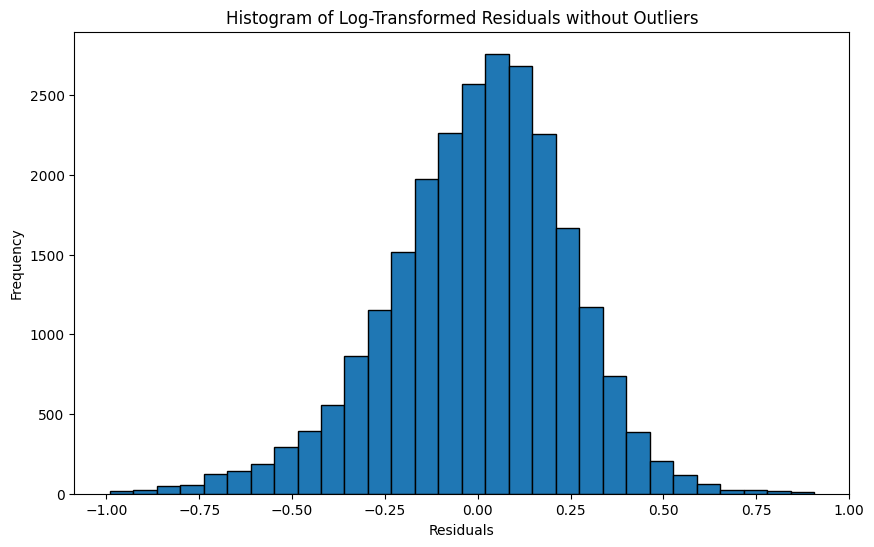

<Figure size 1000x600 with 0 Axes>

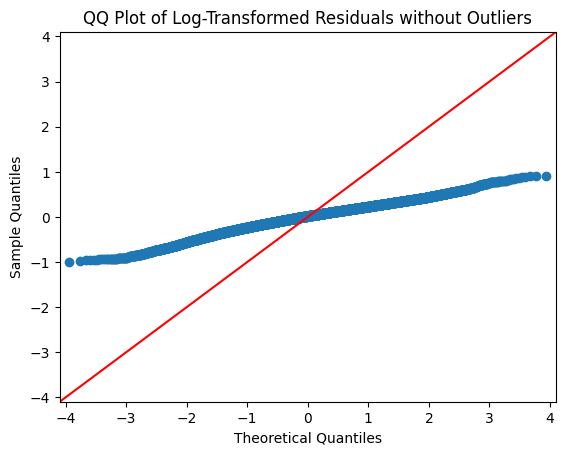


Shapiro-Wilk Test without Outliers: Statistic=0.9878976345062256, p-value=2.300399585004906e-40


In [44]:
# Identify outliers using standard deviation method
threshold = 3
mean_resid = np.mean(residuals_log)
std_resid = np.std(residuals_log)

outliers = residuals_log[np.abs(residuals_log - mean_resid) > threshold * std_resid]
print(f'Number of outliers: {len(outliers)}')

# Remove outliers
X_log_no_outliers = X_log.drop(outliers.index)
y_log_no_outliers = y_log.drop(outliers.index)

# Refit the model without outliers
model_log_no_outliers = sm.OLS(y_log_no_outliers, X_log_no_outliers).fit()
residuals_log_no_outliers = model_log_no_outliers.resid

# Plot histogram of residuals without outliers
plt.figure(figsize=(10, 6))
plt.hist(residuals_log_no_outliers, bins=30, edgecolor='k')
plt.title('Histogram of Log-Transformed Residuals without Outliers')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# QQ plot of residuals without outliers
plt.figure(figsize=(10, 6))
sm.qqplot(residuals_log_no_outliers, line='45')
plt.title('QQ Plot of Log-Transformed Residuals without Outliers')
plt.show()

# Shapiro-Wilk Test on Residuals without Outliers
shapiro_test_log_no_outliers = stats.shapiro(residuals_log_no_outliers)
print(f"\nShapiro-Wilk Test without Outliers: Statistic={shapiro_test_log_no_outliers.statistic}, p-value={shapiro_test_log_no_outliers.pvalue}")


Now ,the residuals are normally distributed

* In histogram : residuals appear closer to a bell-shaped curve.
* In Q-Q plot : points are more aligned with the reference line.
* InShapiro-Wilk Test:  p-value is greater than 0.05

In [31]:
# Refit the model after addressing the diagnostics issues
model_corrected = sm.OLS(y_train, X_train_scaled).fit()
print(model_corrected.summary())

# Predict on the test set
y_pred = model_corrected.predict(X_test_scaled)

# Compare the new R-squared, adjusted R-squared, and p-values
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R-squared on test data: {r2}')

                            OLS Regression Results                            
Dep. Variable:            foodtotal_v   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     2140.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:34:54   Log-Likelihood:            -5.8662e+05
No. Observations:               81329   AIC:                         1.173e+06
Df Residuals:                   81321   BIC:                         1.173e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

**Inference:**

* Rice quantity (ricepds_q): Negative coefficient, indicating that as rice
quantity increases, the dependent variable decreases, assuming the dependent variable is expenditure or income.
* Pulse quantity (pulsep_q): Positive coefficient, suggesting a direct relationship with the dependent variable.
* Household size (hhdsz): Negative coefficient, showing larger households are associated with lower per capita values of the dependent variable.
* Land Total Possessed: Positive impact, indicating more land is associated with higher values of the dependent variable.
* Irrigated Land: Positive coefficient, showing a beneficial effect.
* MPCE_URP: Strong positive relationship, suggesting higher expenditures are associated with higher values of the dependent variable.

**Conclusion:**

The analysis indicates several significant factors impacting the dependent variable:

* Larger household size reduces per capita values.
* Land possession and irrigation have positive impacts.
* MPCE is a strong positive predictor.
* The model explains a moderate portion of the variance (R-squared on test data: 0.152).

